# Info
Name:  

    KORUS_AOD_avg

Purpose:  

    Compare the flights AOD from 4STAR as compared to other values
  
Input:

    none

Output:
   
    plots
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2017-02-21
    

# Prepare the python environment


In [1]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [2]:
import hdf5storage as hs

In [3]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [15]:
import plotting_utils as pu

In [4]:
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [5]:
fp ='C:/Users/sleblan2/Research/KORUS-AQ/'

In [7]:
vr = 'R0'

# Load files


## Load the AOD files from 4STAR

In [ ]:
ar = hs.loadmat(fp+'/aod_ict/all_aod_KORUS_ict.mat')

In [13]:
ar.keys()

[u'AOD1040',
 u'AOD0532',
 u'UNCAOD0452',
 u'UNCAOD0550',
 u'AOD1020',
 u'AOD1627',
 u'AOD0606',
 u'UNCAOD0620',
 u'AOD1559',
 u'AOD1064',
 u'AOD0620',
 u'Latitude',
 u'AOD0550',
 u'AOD0452',
 u'fl_alt1',
 u'fl1',
 u'UNCAOD1236',
 u'fl2',
 u'UNCAOD0501',
 u'UNCAOD0606',
 u'qual_flag',
 u'UNCAOD0675',
 u'AOD0520',
 u'UNCAOD1559',
 u'AOD0501',
 u'Longitude',
 u'UNCAOD0380',
 u'fl',
 u'AOD0675',
 u'fl_QA',
 u'AOD1236',
 u'AOD0380',
 u'UNCAOD0865',
 u'Start_UTC',
 u'UNCAOD0781',
 u'days',
 u'UNCAOD0520',
 u'AOD0781',
 u'UNCAOD1064',
 u'fl_alt',
 u'AOD0865',
 u'amass_aer',
 u'UNCAOD1627',
 u'UNCAOD1020',
 u'UNCAOD0532',
 u'UNCAOD1040',
 u'GPS_Alt']

## Adjust the AOD to reflect dirt contamination

In [142]:
arc = {}
arc['AOD0501'] = ar['AOD0501']-ar['UNCAOD0501']

In [143]:
arc['AOD0501'][ar['UNCAOD0501']>0.02] = arc['AOD0501'][ar['UNCAOD0501']>0.02]+0.02

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


## Filter out bad data

In [19]:
ar['fl'][0]

False

In [18]:
ar['AOD0501'].shape

(583183L,)

## Make some filters for altitudes 

In [33]:
ar['fl_2_8'] = (ar['GPS_Alt']<=8000) & (ar['GPS_Alt']>2000) & ar['fl_QA']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [35]:
ar['fl_1.5_2'] = (ar['GPS_Alt']<=2000) & (ar['GPS_Alt']>1500) & ar['fl_QA']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [36]:
ar['fl_1_1.5'] = (ar['GPS_Alt']<=1500) & (ar['GPS_Alt']>1000) & ar['fl_QA']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [37]:
ar['fl_0.5_1'] = (ar['GPS_Alt']<=1000) & (ar['GPS_Alt']>500) & ar['fl_QA']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [38]:
ar['fl_0.5'] = (ar['GPS_Alt']<=500) & ar['fl_QA']

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


# Plot out some AOD statistics

## Make some simple plots first

<IPython.core.display.Javascript object>


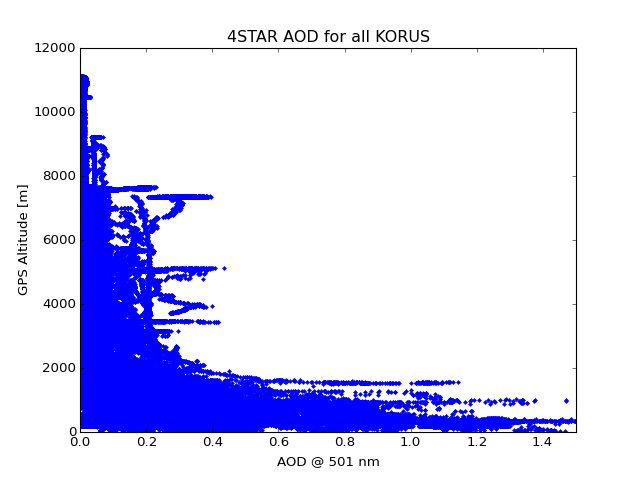

In [136]:
plt.figure()
plt.plot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.')
plt.ylim([0,12000])
plt.xlim([0,1.5])
plt.title('4STAR AOD for all KORUS')
plt.xlabel('AOD @ 501 nm')
plt.ylabel('GPS Altitude [m]')

<IPython.core.display.Javascript object>


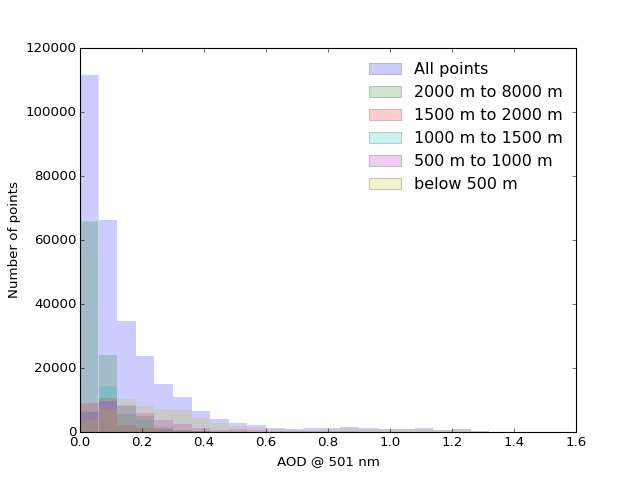

In [137]:
plt.figure()
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='All points')
plt.hist(arc['AOD0501'][ar['fl_2_8']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='2000 m to 8000 m')
plt.hist(arc['AOD0501'][ar['fl_1.5_2']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='1500 m to 2000 m')
plt.hist(arc['AOD0501'][ar['fl_1_1.5']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='1000 m to 1500 m')
plt.hist(arc['AOD0501'][ar['fl_0.5_1']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='500 m to 1000 m')
plt.hist(arc['AOD0501'][ar['fl_0.5']],bins=25,range=(0,1.5),edgecolor='None',alpha=0.2,label='below 500 m')
plt.ylabel('Number of points')
plt.xlabel('AOD @ 501 nm')
plt.legend(frameon=False)

<IPython.core.display.Javascript object>


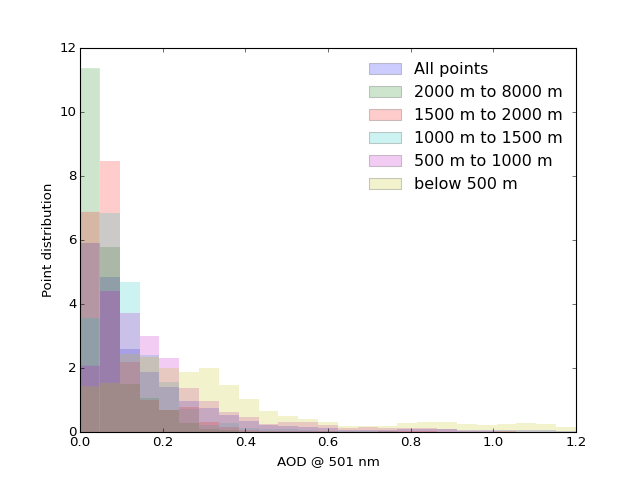

In [144]:
plt.figure()
plt.hist(arc['AOD0501'][ar['fl']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='All points',normed=True)
plt.hist(arc['AOD0501'][ar['fl_2_8']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='2000 m to 8000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_1.5_2']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='1500 m to 2000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_1_1.5']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='1000 m to 1500 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_0.5_1']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='500 m to 1000 m',normed=True)
plt.hist(arc['AOD0501'][ar['fl_0.5']],bins=25,range=(0,1.2),edgecolor='None',alpha=0.2,label='below 500 m',normed=True)
plt.ylabel('Point distribution')
plt.xlabel('AOD @ 501 nm')
plt.legend(frameon=False)

In [109]:
n[-2][:-1]

array([ 0.  ,  0.06,  0.12,  0.18,  0.24,  0.3 ,  0.36,  0.42,  0.48,
        0.54,  0.6 ,  0.66,  0.72,  0.78,  0.84,  0.9 ,  0.96,  1.02,
        1.08,  1.14])

In [111]:
y=[(nn+n[-2][j+1])/2.0 for j,nn in enumerate(n[-2][:-1])]

In [123]:
n[1]

array([ 0.  ,  0.06,  0.12,  0.18,  0.24,  0.3 ,  0.36,  0.42,  0.48,
        0.54,  0.6 ,  0.66,  0.72,  0.78,  0.84,  0.9 ,  0.96,  1.02,
        1.08,  1.14,  1.2 ])

<IPython.core.display.Javascript object>


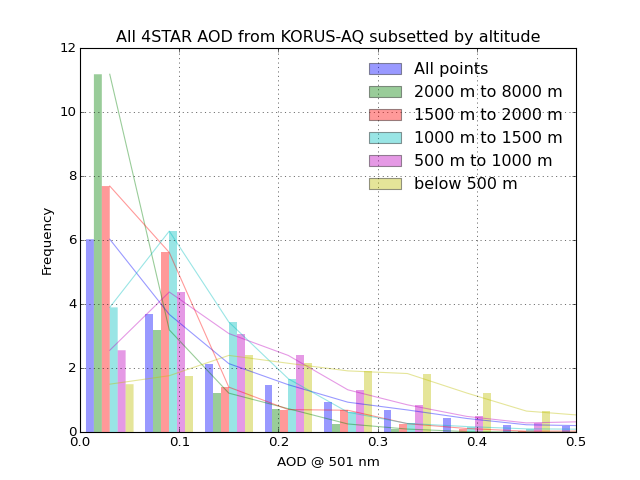

In [145]:
plt.figure()
n=plt.hist([arc['AOD0501'][ar['fl']],
          arc['AOD0501'][ar['fl_2_8']],
          arc['AOD0501'][ar['fl_1.5_2']],
          arc['AOD0501'][ar['fl_1_1.5']],
          arc['AOD0501'][ar['fl_0.5_1']],
          arc['AOD0501'][ar['fl_0.5']]
         ],bins=20,range=(0,1.2),normed=True,edgecolor='None',alpha=0.4,
         label=['All points','2000 m to 8000 m','1500 m to 2000 m','1000 m to 1500 m','500 m to 1000 m','below 500 m'])
y = [(nn+n[1][j+1])/2.0 for j,nn in enumerate(n[1][:-1])]
for i,p in enumerate(n[-1]):
    plt.plot(y,n[0][i],'-',color=p[0].get_facecolor())
plt.legend(frameon=False)
plt.grid()
plt.xlim(0,0.5)
plt.xlabel('AOD @ 501 nm')
plt.ylabel('Frequency')
plt.title('All 4STAR AOD from KORUS-AQ subsetted by altitude')
plt.savefig(fp+'plot/AOD_hist_alt_KORUS.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


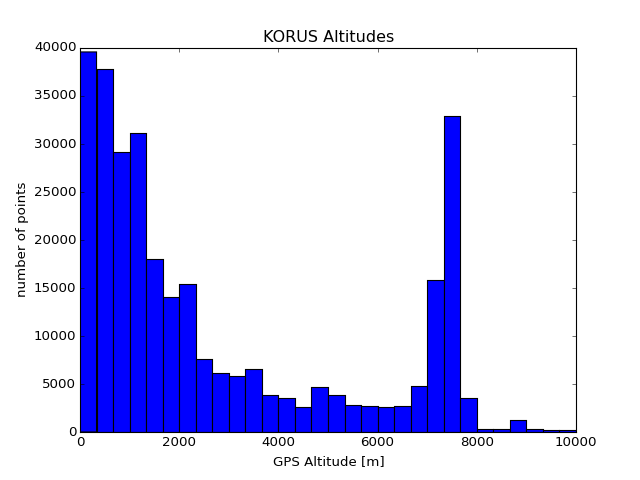

In [52]:
plt.figure()
n,bins,p = plt.hist(ar['GPS_Alt'][ar['fl']],bins=30,range=(0,10000))
plt.xlabel('GPS Altitude [m]')
plt.ylabel('number of points')
plt.title('KORUS Altitudes')

## Build vertical distribution of AOD

In [53]:
bins.shape

(31L,)

In [132]:
pos = np.array([(bins[i]+bins[i+1])/2.0 for i,b in enumerate(bins[:-1])])

In [60]:
len(pos)

30

<IPython.core.display.Javascript object>


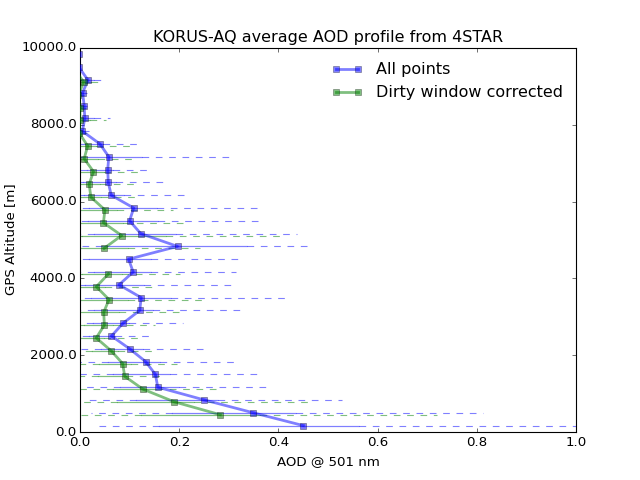

In [146]:
plt.figure()
plt.plot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],'.',alpha=0.0,color='w')
pu.make_boxplot(ar['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos,color='blue',alpha=0.5,y=0,vert=False,label='All points',fliers_off=True)
pu.make_boxplot(arc['AOD0501'][ar['fl']],ar['GPS_Alt'][ar['fl']],
                bins,pos-50.0,color='green',alpha=0.5,y=0,vert=False,label='Dirty window corrected',fliers_off=True)
plt.legend(frameon=False)
plt.xlim(0,1.0)
plt.ylim(0,10000)
plt.xlabel('AOD @ 501 nm')
plt.ylabel('GPS Altitude [m]')
plt.title('KORUS-AQ average AOD profile from 4STAR')
plt.savefig(fp+'plot\\KORUS_AOD_profile_avg.png',transparent=True,dpi=600)